# Final Group Project: Bike Sharing
## GPIM 452: Big Data Analytics
### Group 6: Lin Ou, Luna Zeng, Mingpu Xiao, Qinghui Zhnag
---

## Data Pre-processing

In [1]:
import pandas as pd
import numpy as np 

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
bike_data = pd.read_csv('./Bike_sharing.csv')

In [3]:
bike_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
bike_data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
len(bike_data['datetime'].unique())

10886

In [7]:
len(bike_data)

10886

In [8]:
bike_data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


----------

## Data Exploration

### Pie Chart of casual and registered users

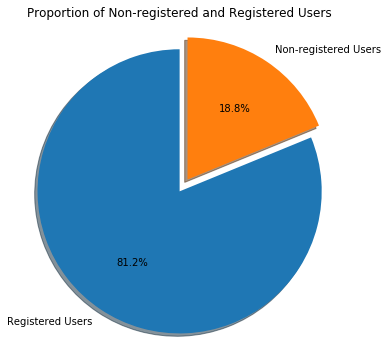

In [9]:
total_casual = sum(bike_data['casual'])
total_registered = sum(bike_data['registered'])

labels = 'Registered Users','Non-registered Users', 
sizes = [total_registered,total_casual]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, labels=labels, shadow=True, explode=explode, startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Proportion of Non-registered and Registered Users')
plt.show()

### Bar Plots and Box Plots for Categorical features

#### By Season

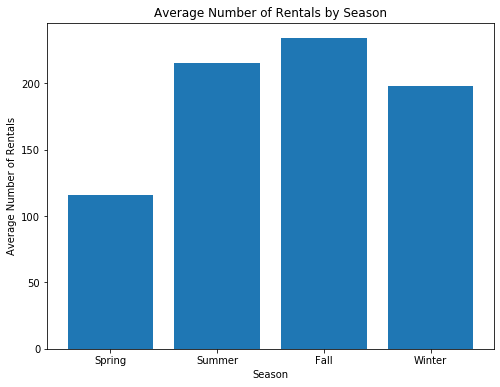

In [10]:
season_count = bike_data.filter(items=['season','count'])
season_avg_count = season_count.groupby(['season']).mean()
season_avg_count

x_data=['Spring','Summer','Fall','Winter']
y_data=[116,215,234,198]

plt.figure(figsize=(8, 6))
plt.bar(x=x_data,height=y_data)
plt.title("Average Number of Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Average Number of Rentals")
plt.show()

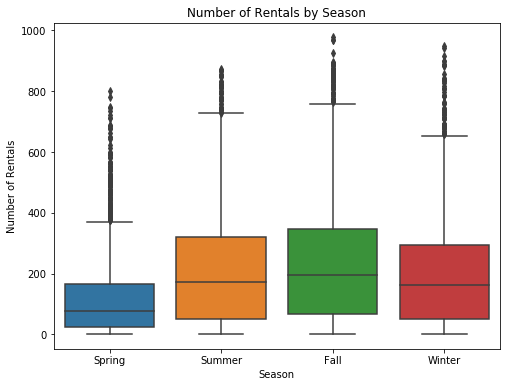

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x='season', y='count', data=bike_data)
plt.title('Number of Rentals by Season')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.xlabel("Season")
plt.ylabel("Number of Rentals")
plt.show()

#### By Hour

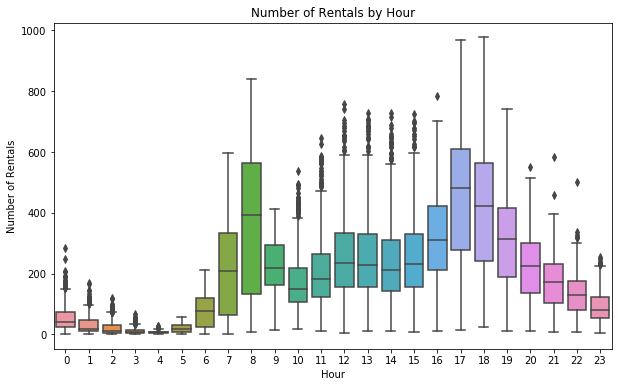

In [12]:
bike_data['hour'] = bike_data['datetime'].str[-5:-3]

plt.figure(figsize=(10,6))
sns.boxplot(x='hour', y='count', data=bike_data)
plt.title('Number of Rentals by Hour')
plt.xlabel("Hour")
plt.ylabel("Number of Rentals")
plt.show()

In [13]:
bike_data = bike_data.drop('hour',axis=1)

#### By Weather

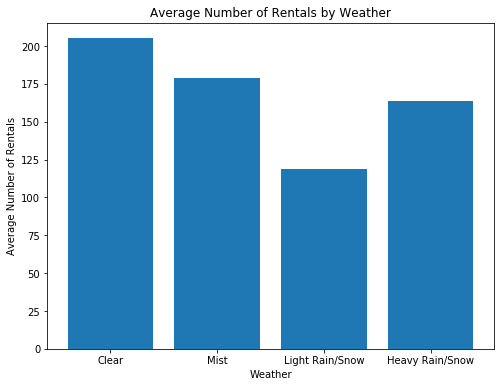

In [14]:
weather_count = bike_data.filter(items=['weather','count'])
weather_avg_count = weather_count.groupby(['weather']).mean()
weather_avg_count

x_data=['Clear','Mist','Light Rain/Snow','Heavy Rain/Snow']
y_data=[205.23,178.95,118.84,164]

plt.figure(figsize=(8, 6))
plt.bar(x=x_data,height=y_data)
plt.title("Average Number of Rentals by Weather")
plt.xlabel("Weather")
plt.ylabel("Average Number of Rentals")
plt.show()

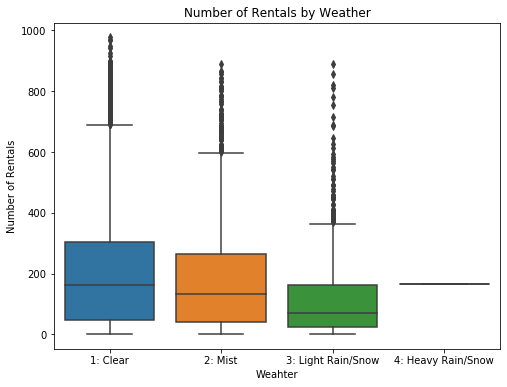

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x='weather', y='count', data=bike_data)
plt.title('Number of Rentals by Weather')
plt.xlabel("Weahter")
plt.xticks([0, 1, 2, 3], ['1: Clear', '2: Mist', '3: Light Rain/Snow', '4: Heavy Rain/Snow'])
plt.ylabel("Number of Rentals")
plt.show()

-----------

## Data Preparation

## Transforming `season` into dummies

In [16]:
bike_data['season'].unique()

array([1, 2, 3, 4])

In [17]:
bike_data['season_str'] = bike_data['season'].apply(str)

In [18]:
season_col = ['season', 'season_str']
dummy_season = pd.get_dummies(bike_data['season_str'], drop_first=True) 
bike_data = bike_data.drop(season_col, axis = 1)
bike_data = bike_data.join(dummy_season)

In [19]:
bike_data.rename(columns={bike_data.columns[-3]:'summer', 
                          bike_data.columns[-2]:'fall', 
                          bike_data.columns[-1]:'winter'}, inplace=True)
bike_data.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,summer,fall,winter
0,1/1/2011 0:00,0,0,1,9.84,14.395,81,0.0,3,13,16,0,0,0
1,1/1/2011 1:00,0,0,1,9.02,13.635,80,0.0,8,32,40,0,0,0
2,1/1/2011 2:00,0,0,1,9.02,13.635,80,0.0,5,27,32,0,0,0
3,1/1/2011 3:00,0,0,1,9.84,14.395,75,0.0,3,10,13,0,0,0
4,1/1/2011 4:00,0,0,1,9.84,14.395,75,0.0,0,1,1,0,0,0


## Transforming `weather` into dummies 

In [20]:
bike_data['weather'].unique()

array([1, 2, 3, 4])

In [21]:
bike_data['weather_str'] = bike_data['weather'].apply(str)
weather_col = ['weather', 'weather_str']

dummy_weather = pd.get_dummies(bike_data['weather_str'], drop_first=True) 
bike_data = bike_data.drop(weather_col, axis = 1)
bike_data = bike_data.join(dummy_weather)

bike_data.rename(columns={bike_data.columns[-3]:'weather_2', 
                          bike_data.columns[-2]:'weather_3', 
                          bike_data.columns[-1]:'weather_4'}, inplace=True)
# weather, 1 = best, 4 = worst
bike_data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,summer,fall,winter,weather_2,weather_3,weather_4
0,1/1/2011 0:00,0,0,9.84,14.395,81,0.0,3,13,16,0,0,0,0,0,0
1,1/1/2011 1:00,0,0,9.02,13.635,80,0.0,8,32,40,0,0,0,0,0,0
2,1/1/2011 2:00,0,0,9.02,13.635,80,0.0,5,27,32,0,0,0,0,0,0
3,1/1/2011 3:00,0,0,9.84,14.395,75,0.0,3,10,13,0,0,0,0,0,0
4,1/1/2011 4:00,0,0,9.84,14.395,75,0.0,0,1,1,0,0,0,0,0,0


In [22]:
bike_data.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'summer', 'fall',
       'winter', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [23]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   atemp       10886 non-null  float64
 5   humidity    10886 non-null  int64  
 6   windspeed   10886 non-null  float64
 7   casual      10886 non-null  int64  
 8   registered  10886 non-null  int64  
 9   count       10886 non-null  int64  
 10  summer      10886 non-null  uint8  
 11  fall        10886 non-null  uint8  
 12  winter      10886 non-null  uint8  
 13  weather_2   10886 non-null  uint8  
 14  weather_3   10886 non-null  uint8  
 15  weather_4   10886 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(6)
memory usage: 914.4+ KB


## Get Dummies for day-hours

In [24]:
bike_data['hour'] = bike_data['datetime'].str[-5:-3]
bike_data['hour'].unique()

array([' 0', ' 1', ' 2', ' 3', ' 4', ' 5', ' 6', ' 7', ' 8', ' 9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [25]:
bike_data['daytime'] = bike_data['hour']
daytime = ['daytime', 'hour', 'datetime']

bike_data['daytime'].replace([' 0',' 1',' 2',' 3',' 4',' 5'],'0', inplace=True)
bike_data['daytime'].replace([' 6',' 7',' 8',' 9','10','11'],'1', inplace=True)
bike_data['daytime'].replace(['12','13','14','15','16','17'],'2', inplace=True)
bike_data['daytime'].replace(['18','19','20','21','22','23'],'3', inplace=True)

dummy_daytime = pd.get_dummies(bike_data['daytime'], drop_first=True) 
bike_data = bike_data.drop(daytime, axis = 1)
bike_data = bike_data.join(dummy_daytime)

bike_data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,summer,fall,winter,weather_2,weather_3,weather_4,1,2,3
0,0,0,9.84,14.395,81,0.0,3,13,16,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0,8,32,40,0,0,0,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0,5,27,32,0,0,0,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0,3,10,13,0,0,0,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0,0,1,1,0,0,0,0,0,0,0,0,0


In [26]:
bike_data.rename(columns={bike_data.columns[-3]:'morning', 
                          bike_data.columns[-2]:'afternoon', 
                          bike_data.columns[-1]:'evening'}, inplace=True)
bike_data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,summer,fall,winter,weather_2,weather_3,weather_4,morning,afternoon,evening
0,0,0,9.84,14.395,81,0.0,3,13,16,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0,8,32,40,0,0,0,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0,5,27,32,0,0,0,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0,3,10,13,0,0,0,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0,0,1,1,0,0,0,0,0,0,0,0,0


---------------------
## Research question

- DV: `count` ~ # rentals each hour
- X: have a simple hypothesis of the predictive relationship ~ positive OR negative

- Method: Regression -- OLS, Lasso, Ridge, ElasticNet

- Graph: corr-heatmap, distribution/density,hist, distribution of DVs

In [27]:
bike_data['count'].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
667      1
603      1
587      1
970      1
843      1
Name: count, Length: 822, dtype: int64

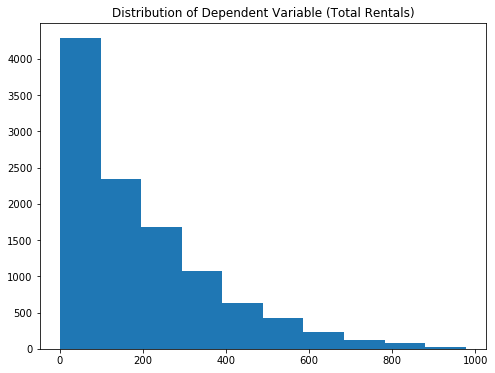

In [28]:
plt.figure(figsize=(8,6))
plt.hist(bike_data['count'])
plt.title('Distribution of Dependent Variable (Total Rentals)')
plt.show()

In [29]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     10886 non-null  int64  
 1   workingday  10886 non-null  int64  
 2   temp        10886 non-null  float64
 3   atemp       10886 non-null  float64
 4   humidity    10886 non-null  int64  
 5   windspeed   10886 non-null  float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  int64  
 9   summer      10886 non-null  uint8  
 10  fall        10886 non-null  uint8  
 11  winter      10886 non-null  uint8  
 12  weather_2   10886 non-null  uint8  
 13  weather_3   10886 non-null  uint8  
 14  weather_4   10886 non-null  uint8  
 15  morning     10886 non-null  uint8  
 16  afternoon   10886 non-null  uint8  
 17  evening     10886 non-null  uint8  
dtypes: float64(3), int64(6), uint8(9)
memory usage: 861.2 KB


----------------------
## Data Description

### Correlation Heat Map

In [30]:
bike_data.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,summer,fall,winter,weather_2,weather_3,weather_4,morning,afternoon,evening
holiday,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.038250,0.022790,0.022751,0.013868,-0.019514,-0.001644,0.000009,-0.000209,-0.000209
workingday,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.014620,-0.007194,-0.007048,0.003324,0.036643,0.006562,0.000551,0.001421,0.001421
temp,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.192661,0.635975,-0.266220,-0.046925,-0.025715,-0.014800,-0.083082,0.192212,0.026835
atemp,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.204421,0.607090,-0.245690,-0.040792,-0.031154,-0.013901,-0.082059,0.183220,0.028176
humidity,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.031095,0.067308,0.129018,0.222398,0.295894,0.012010,0.136212,-0.366185,-0.046519
windspeed,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.042991,-0.091521,-0.079535,-0.045016,0.045597,-0.007979,-0.036302,0.196395,0.009199
casual,0.043799,-0.319111,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.132405,0.187726,-0.086258,-0.062184,-0.108853,-0.005760,-0.081833,0.444388,-0.004434
registered,-0.020956,0.119460,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.046969,0.102142,0.056961,-0.028997,-0.104936,0.000155,0.097455,0.267152,0.143196
count,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.075681,0.136942,0.023704,-0.041329,-0.117519,-0.001459,0.058689,0.345317,0.118175
summer,-0.038250,0.014620,0.192661,0.204421,-0.031095,0.042991,0.132405,0.046969,0.075681,1.000000,-0.335214,-0.335296,-0.001687,0.006556,-0.005549,-0.000676,-0.001412,-0.001412


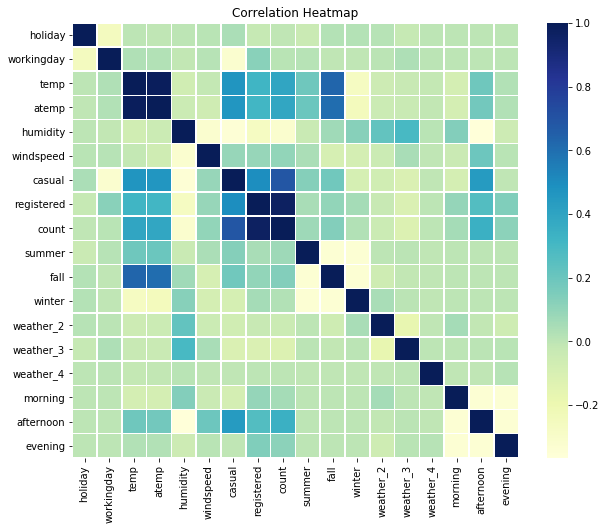

In [31]:
plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap')
sns.heatmap(bike_data.corr(),annot=False, fmt="f", cmap="YlGnBu", linewidths=0.5)
plt.show()

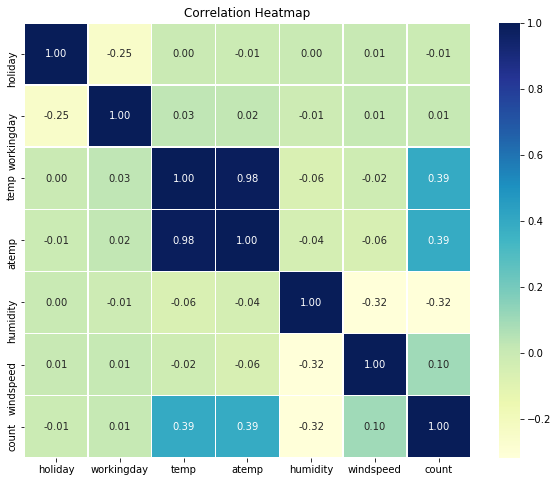

In [32]:
var = bike_data.drop(['casual']+['registered']+['summer']+['fall']+['winter']
                     +['weather_2']+['weather_3']+['weather_4']
                     +['morning']+['afternoon']+['evening'],axis=1)

correlation_matrix = var.corr()


plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap')
sns.heatmap(correlation_matrix,annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

--------------

## Modeling

In [33]:
#bike_data['temp_sq'] = bike_data['temp']**2
#bike_data['atemp_sq'] = bike_data['atemp']**2
#bike_data['humid_sq'] = bike_data['humidity']**2

bike_data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,summer,fall,winter,weather_2,weather_3,weather_4,morning,afternoon,evening
0,0,0,9.84,14.395,81,0.0,3,13,16,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0,8,32,40,0,0,0,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0,5,27,32,0,0,0,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0,3,10,13,0,0,0,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0,0,1,1,0,0,0,0,0,0,0,0,0


In [34]:
X = bike_data.drop(columns = ['casual','count','registered'])
y = bike_data['count']

X.head()

,holiday,workingday,temp,atemp,humidity,windspeed,summer,fall,winter,weather_2,weather_3,weather_4,morning,afternoon,evening
0,0,0,9.84,14.395,81,0.0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0,0,0,0,0,0,0,0,0,0


In [35]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

seed = 666
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

## 1. Simple practices
### 1) linear regression

In [37]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

simple_lr_r2 = lr_model.score(X_test, y_test)
simple_lr_mse = mean_squared_error(y_test,lr_pred)

print('Linear regression: \n\n',
     'MSE = ', simple_lr_mse, '\n',
     'R-square = ', simple_lr_r2)

Linear regression: 

 MSE =  17940.960278180693 
 R-square =  0.4477953202321728


### 2) Ridge regression

In [38]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

simple_ridge_mse = mean_squared_error(y_test,ridge_pred)
simple_ridge_r2 = ridge_model.score(X_test, y_test)

print('Ridge regression: \n\n',
     'MSE = ', simple_ridge_mse, '\n',
     'R-square = ', simple_ridge_r2)

Ridge regression: 

 MSE =  17941.752717006097 
 R-square =  0.4477709297636008


### 3) Lasso regression


In [39]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(max_iter=7000)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

simple_lasso_mse = mean_squared_error(y_test,lasso_pred)
simple_lasso_r2 = lasso_model.score(X_test, y_test)

print('Lasso regression: \n\n',
     'MSE = ', simple_lasso_mse, '\n',
     'R-square = ', simple_lasso_r2)

Lasso regression: 

 MSE =  18069.290531823906 
 R-square =  0.4438454443326225


### 4) Elastic Net

In [40]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=7000)
elastic_model.fit(X_train, y_train)
elastic_pred = elastic_model.predict(X_test)

simple_elastic_mse = mean_squared_error(y_test,elastic_pred)
simple_elastic_r2 = elastic_model.score(X_test, y_test) 

print('ElasticNet regression: \n\n',
     'MSE = ',simple_elastic_mse, '\n',
     'R-square = ', simple_elastic_r2)

ElasticNet regression: 

 MSE =  23418.536931558938 
 R-square =  0.2792010301338289


### 5) K-nearest-neighbor regression

In [41]:
from sklearn import neighbors

knn_model = neighbors.KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

simple_knn_mse = mean_squared_error(y_test,knn_pred)
simple_knn_r2 = knn_model.score(X_test, y_test)

print('K nearest neighbors regression: \n\n',
     'MSE = ', simple_knn_mse, '\n',
     'R-square = ', simple_knn_r2)

K nearest neighbors regression: 

 MSE =  25215.24831741367 
 R-square =  0.22390006407195373


### 6) Decision tree regression

In [42]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=seed)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

simple_dt_mse = mean_squared_error(y_test,dt_pred)
simple_dt_r2 = dt_model.score(X_test, y_test)

print('Decision tree regression: \n\n',
     'MSE = ',simple_dt_mse, '\n',
     'R-square = ', simple_dt_r2)

Decision tree regression: 

 MSE =  26592.348768470896 
 R-square =  0.18151429977654887


### 7) Random Forest Regression 

In [43]:
from sklearn.ensemble import RandomForestRegressor 

rf_model = RandomForestRegressor(random_state=seed)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

simple_rf_mse = mean_squared_error(y_test, rf_pred)
simple_rf_r2 = rf_model.score(X_test, y_test)

print('Random Forest regression: \n\n',
     'MSE = ',simple_rf_mse, '\n',
     'R-square = ', simple_rf_r2)

Random Forest regression: 

 MSE =  15533.48288278446 
 R-square =  0.52189504865027


## 2. Hyperparameter tuning

### 1) Ridge

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

ridge_grid = GridSearchCV(ridge_model, param_grid, cv=10)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)

{'alpha': 1.0}
0.4400499314758818


In [46]:
ridge_tuned = ridge_grid.best_estimator_
ridge_tuned_pred = ridge_tuned.predict(X_test)

tuned_ridge_mse = mean_squared_error(y_test, ridge_tuned_pred)
tuned_ridge_r2 = ridge_tuned.score(X_test, y_test)

print('GridSearchCV of ridge regression: \n\n',
     'MSE = ', tuned_ridge_mse, '\n',
     'R-square = ',tuned_ridge_r2)

GridSearchCV of ridge regression: 

 MSE =  17941.752717006097 
 R-square =  0.4477709297636008


### 2) Lasso

In [47]:
lasso_model = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso_model, param_grid, cv=10)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
print(lasso_grid.best_params_)
print(lasso_grid.best_score_)

{'alpha': 0.2}
0.440182240283129


In [49]:
lasso_tuned = lasso_grid.best_estimator_
lasso_tuned_pred = lasso_tuned.predict(X_test)

tuned_lasso_mse = mean_squared_error(y_test, lasso_tuned_pred)
tuned_lasso_r2 = lasso_tuned.score(X_test, y_test)

print('GridSearchCV of lasso regression: \n\n',
     'MSE = ', tuned_lasso_mse, '\n',
     'R-square = ',tuned_lasso_r2)

GridSearchCV of lasso regression: 

 MSE =  17952.947370431382 
 R-square =  0.44742636961107984


### 3) Elastic Net

In [50]:
param_grid = {'alpha': [0.2,0.6,1.0], 
              'l1_ratio': [0.1,0.3,0.5,0.7,0.9]}

elastic_model = ElasticNet(max_iter=10000)
elastic_grid = GridSearchCV(elastic_model, param_grid, cv=10)
elastic_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=10000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.2, 0.6, 1.0],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
print(elastic_grid.best_params_)
print(elastic_grid.best_score_)

{'alpha': 0.2, 'l1_ratio': 0.9}
0.42549655650104035


In [52]:
elastic_tuned = elastic_grid.best_estimator_
elastic_tuned_pred = elastic_tuned.predict(X_test)

tuned_elastic_mse = mean_squared_error(y_test, elastic_tuned_pred)
tuned_elastic_r2 = elastic_tuned.score(X_test, y_test)

print('GridSearchCV of elastic net regression: \n\n',
     'MSE = ', tuned_elastic_mse, '\n',
     'R-square = ',tuned_elastic_r2)

GridSearchCV of elastic net regression: 

 MSE =  18534.679803558705 
 R-square =  0.42952123148219656


### 4) K-nearest Neighbors regression

In [53]:
param_grid = {'n_neighbors':[500,1000,2000], 
              'weights': ['uniform', 'distance'],
              'leaf_size':[50,100,200],
              'p':[1,2]}

knn_model = neighbors.KNeighborsRegressor()
knn_grid = GridSearchCV(knn_model, param_grid, cv=10)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [50, 100, 200],
                         'n_neighbors': [500, 1000, 2000], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
print(knn_grid.best_params_)
print(knn_grid.best_score_)

{'leaf_size': 200, 'n_neighbors': 500, 'p': 1, 'weights': 'distance'}
0.31804467402278475


In [55]:
knn_tuned = knn_grid.best_estimator_
knn_tuned_pred = knn_tuned.predict(X_test)

tuned_knn_mse = mean_squared_error(y_test, knn_tuned_pred)
tuned_knn_r2 = knn_tuned.score(X_test, y_test)

print('GridSearchCV of K-nearest neighbors regression: \n\n',
     'MSE = ', tuned_knn_mse, '\n',
     'R-square = ',tuned_knn_r2)

GridSearchCV of K-nearest neighbors regression: 

 MSE =  21715.545628867305 
 R-square =  0.331617386469778


### 5) Decision tree regression

In [56]:
%%time
param_grid = {'max_depth':[10,15,20],
              'min_samples_leaf':[10,20,30,40,50],
              'ccp_alpha':[0,0.0001]}

dt_model = DecisionTreeRegressor(random_state=seed)
dt_grid = GridSearchCV(dt_model, param_grid, cv=10)
dt_grid.fit(X_train, y_train)

CPU times: user 6.5 s, sys: 21.2 ms, total: 6.52 s
Wall time: 6.56 s


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=666,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [0, 0.0001], 'max_depth': [10, 15, 20],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
         

In [57]:
print(dt_grid.best_params_)
print(dt_grid.best_score_)

{'ccp_alpha': 0, 'max_depth': 15, 'min_samples_leaf': 30}
0.5192460653362809


In [58]:
dt_tuned = dt_grid.best_estimator_
dt_tuned_pred = dt_tuned.predict(X_test)

tuned_dt_mse = mean_squared_error(y_test, dt_tuned_pred)
tuned_dt_r2 = dt_tuned.score(X_test, y_test)

print('GridSearchCV of decision tree regression: \n\n',
     'MSE = ', tuned_dt_mse, '\n',
     'R-square = ',tuned_dt_r2)

GridSearchCV of decision tree regression: 

 MSE =  15504.183947904983 
 R-square =  0.5227968403437914


### 6) Random Forest Regression

In [59]:
%%time
param_grid = {'max_depth':[5,10,20],
              'min_samples_leaf':[5,10,20],
              'ccp_alpha':[0,0.0001]}

rf_model = RandomForestRegressor(random_state=seed)
rf_grid = GridSearchCV(rf_model, param_grid, cv=10)
rf_grid.fit(X_train, y_train)

CPU times: user 4min 10s, sys: 964 ms, total: 4min 11s
Wall time: 4min 12s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=666,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [60]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'ccp_alpha': 0, 'max_depth': 10, 'min_samples_leaf': 5}
0.5581021225959557


In [61]:
rf_tuned = rf_grid.best_estimator_
rf_tuned_pred = rf_tuned.predict(X_test)

tuned_rf_mse = mean_squared_error(y_test, rf_tuned_pred)
tuned_rf_r2 = rf_tuned.score(X_test, y_test)

print('GridSearchCV of random forest regression: \n\n',
     'MSE = ', tuned_rf_mse, '\n',
     'R-square = ',tuned_rf_r2)

GridSearchCV of random forest regression: 

 MSE =  14105.09651482229 
 R-square =  0.5658593417915101


### Random Forest Regression is the winner

**Print and plot the feature importance**

In [62]:
rowname = X.columns
feature_importance = rf_tuned.feature_importances_

tab = pd.DataFrame(feature_importance, index=rowname)
tab.rename(columns={0:"Feature importance"}, inplace=True)
tab.sort_values(by="Feature importance", ascending=False, inplace=True)
tab

,Feature importance
atemp,0.239198
evening,0.141455
humidity,0.133296
afternoon,0.119489
morning,0.101945
temp,0.091686
workingday,0.062956
windspeed,0.041083
winter,0.029895
weather_3,0.016048


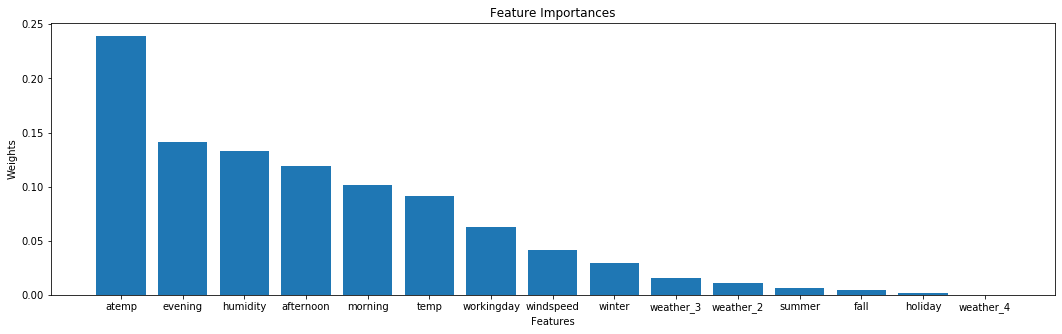

In [63]:
plt.figure(figsize=(18,5))
plt.bar(tab.index, tab['Feature importance']) 
plt.title("Feature Importances") 
plt.xlabel("Features")
plt.ylabel("Weights")
plt.show()

## Table for ALL results 

In [70]:
simple_mse = [simple_lr_mse, simple_ridge_mse, simple_lasso_mse, simple_elastic_mse, 
             simple_knn_mse, simple_dt_mse, simple_rf_mse]
simple_r2 = [simple_lr_r2, simple_ridge_r2, simple_lasso_r2, simple_elastic_r2, 
             simple_knn_r2, simple_dt_r2, simple_rf_r2]

tuned_mse = ["NA", tuned_ridge_mse, tuned_lasso_mse, tuned_elastic_mse, 
             tuned_knn_mse, tuned_dt_mse, tuned_rf_mse]
tuned_r2 = ["NA", tuned_ridge_r2, tuned_lasso_r2, tuned_elastic_r2, 
             tuned_knn_r2, tuned_dt_r2, tuned_rf_r2]

dict = {'MSE':simple_mse, 'R-square':simple_r2, 
        'Hyperparameter MSE':tuned_mse, 'Hyperparameter R-square':tuned_r2}

rowname = ["OLS", "Ridge", "Lasson", "ElasticNet", "KNeighbor", "DecisionTree", "RandomForest"]

result = pd.DataFrame(dict, index=rowname)
result

,MSE,R-square,Hyperparameter MSE,Hyperparameter R-square
OLS,17940.960278,0.447795,NA,NA
Ridge,17941.752717,0.447771,17941.8,0.447771
Lasson,18069.290532,0.443845,17952.9,0.447426
ElasticNet,23418.536932,0.279201,18534.7,0.429521
KNeighbor,25215.248317,0.223900,21715.5,0.331617
DecisionTree,26592.348768,0.181514,15504.2,0.522797
RandomForest,15533.482883,0.521895,14105.1,0.565859


## Visualize the results

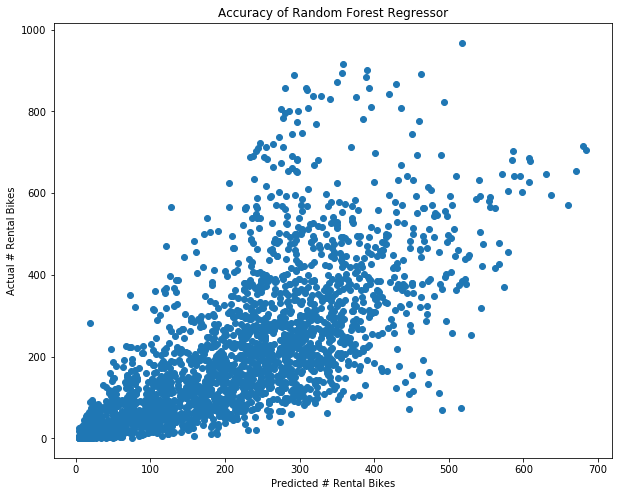

In [67]:
plt.figure(figsize=(10,8))
plt.scatter(rf_tuned_pred,y_test)
plt.xlabel('Predicted # Rental Bikes')
plt.ylabel('Actual # Rental Bikes')
plt.title('Accuracy of Random Forest Regressor')
plt.show()